In [ ]:
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.8/680.8 kB 24.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

In [ ]:
!pip install meshio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 10.1 MB/s eta 0:00:00


Vizualize

In [ ]:
mesh = trimesh.load("...")
mesh.show()

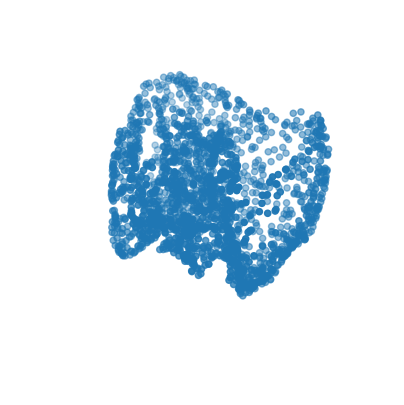

In [ ]:
points = mesh.sample(2048)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()
plt.show()

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Split folders

In [ ]:
import os
import random
import shutil

src_dir = '...'
train_dir = '...'
test_dir = '...'

split_ratio = 0.7

image_filenames = os.listdir(src_dir)

random.shuffle(image_filenames)

split_index = int(len(image_filenames) * split_ratio)
train_filenames = image_filenames[:split_index]
test_filenames = image_filenames[split_index:]

for filename in train_filenames:
    src_path = os.path.join(src_dir, filename)
    dst_path = os.path.join(train_dir, filename)
    shutil.copy(src_path, dst_path)

for filename in test_filenames:
    src_path = os.path.join(src_dir, filename)
    dst_path = os.path.join(test_dir, filename)
    shutil.copy(src_path, dst_path)


In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled P

In [ ]:
import open3d as o3d

In [ ]:
DATA_DIR='...'

In [ ]:
def parse_dataset(num_points=2048):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [ ]:

NUM_POINTS = 2048
NUM_CLASSES = 2
BATCH_SIZE = 128

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

processing class: Benign
processing class: Malignant


In [ ]:
print(train_points)

[[[ 0.4389513   0.21759413 -0.12735358]
  [ 0.47095838  0.21899669 -0.05832824]
  [ 0.17172251  0.30846087  0.05759946]
  ...
  [ 0.28609979  0.30224097  0.06753418]
  [ 0.30363402  0.3616092  -0.16695529]
  [ 0.14079676  0.30713841  0.04258274]]

 [[ 0.26607204 -0.31948602 -0.08329417]
  [ 0.3287183  -0.27446622 -0.04109478]
  [ 0.2605913  -0.26146222 -0.08807173]
  ...
  [ 0.20452109 -0.27247909 -0.09796728]
  [ 0.22028919 -0.14024379  0.0389355 ]
  [ 0.20299351 -0.42574053 -0.02938142]]

 [[ 0.14762586  0.30967045  0.3099666 ]
  [ 0.45220548  0.29919537  0.31262852]
  [ 0.01617539  0.15031115 -0.02529079]
  ...
  [ 0.01334644  0.13051624  0.15572049]
  [ 0.13508672  0.16113377  0.2636069 ]
  [ 0.10913199  0.170581    0.28238852]]

 ...

 [[-0.42991182  0.13174852  0.11647589]
  [-0.47940813  0.10987377  0.14989837]
  [-0.40940767  0.12352484  0.3219958 ]
  ...
  [-0.49785414  0.29100511  0.25963812]
  [-0.49761485  0.09085344  0.40189842]
  [-0.40814202  0.24186184  0.04965754]]

 [

In [ ]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.009, 0.009, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))


train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)


In [ ]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=3, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    return layers.Activation("relu")(x)

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=2, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    return layers.Activation("relu")(x)

def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    return layers.Activation("relu")(x)

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 64)
    x = conv_bn(x, 64)
    x = conv_bn(x, 256)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 256)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 64)
x = conv_bn(x, 64)
x = tnet(x, 64)
x = conv_bn(x, 64)
x = conv_bn(x, 64)
x = conv_bn(x, 64)
x = conv_bn(x, 256)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="relu")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_114 (Conv1D)            (None, 2047, 64)     448         ['input_14[0][0]']               
                                                                                                  
 batch_normalization_172 (Batch  (None, 2047, 64)    256         ['conv1d_114[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 2047, 64)     0           ['batch_normalization_172[

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=100, validation_data=test_dataset)


Epoch 1/100
3/3 [==============================] - 22s 2s/step - loss: 18.9387 - sparse_categorical_accuracy: 0.4806 - val_loss: 24.5372 - val_sparse_categorical_accuracy: 0.3407
Epoch 2/100
3/3 [==============================] - 1s 384ms/step - loss: 18.4513 - sparse_categorical_accuracy: 0.5452 - val_loss: 16.2270 - val_sparse_categorical_accuracy: 0.6593
Epoch 3/100
3/3 [==============================] - 1s 402ms/step - loss: 18.2998 - sparse_categorical_accuracy: 0.5613 - val_loss: 16.2793 - val_sparse_categorical_accuracy: 0.6593
Epoch 4/100
3/3 [==============================] - 1s 396ms/step - loss: 18.8040 - sparse_categorical_accuracy: 0.5419 - val_loss: 16.4693 - val_sparse_categorical_accuracy: 0.6593
Epoch 5/100
3/3 [==============================] - 1s 385ms/step - loss: 18.8908 - sparse_categorical_accuracy: 0.5839 - val_loss: 16.7418 - val_sparse_categorical_accuracy: 0.6593
Epoch 6/100
3/3 [==============================] - 1s 389ms/step - loss: 18.5702 - sparse_categor

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print("Overall Accuracy:", accuracy)

2/2 [==============================] - 0s 22ms/step - loss: 11.6542 - sparse_categorical_accuracy: 0.7185
Overall Accuracy: 0.7185184955596924


In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()
